# Notes & Drafts

## Data Science


Measures of spread: 

- $Quartiles$: The spread of the data by breaking it into quartiles.

    - 1st quartile: Split data into four equal parts $\Longrightarrow$ e.g. 100 data sets $\Rightarrow$ take 25th and 26th data points and calculate average.
    - 2nd quartile: 50th and 51st $\Longrightarrow$ calculate average.
    - 3rd quartile - 75th and 76th $\Longrightarrow$ calculate average.

- $Range$: Difference between highest and lowest values; ${max} - {min} $
    
    
- $Variance$: How much a random variable deviates from its expected value.

    - Population variance: calculated using ${N}$ and ${\mu}$
    - Sample variance: calculated using ${n}$ and ${\bar{x}}$
    
- $Deviation$: Measure of dispersion of a set of data from it's mean.
    
    - Standard deviation: 
        $\sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 }$

- $Entropy$: 
    

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading the data
data = pd.read_csv("https://github.com/mubaris/potential-enigma/raw/master/headbrain.csv")
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
# Collecting X and Y

X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [21]:
# Mean X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# Calculating b1 and b0
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print("b1: %.4f \tb2: %.4f" % (b1, b0))

b1: 0.2634 	b2: 325.5734


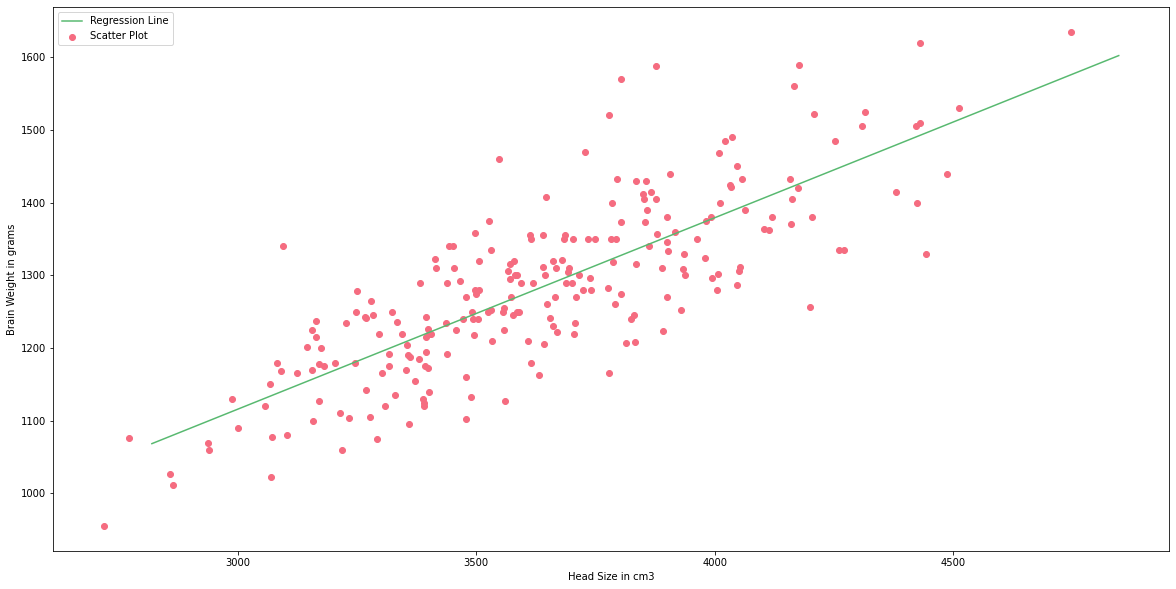

In [27]:
# Plotting values and regression line

max_x = np.max(X) + 100
min_x = np.min(X) + 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

# Plotting line
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X, Y, c='#f56c80', label='Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [22]:
# Calculate R^2 value

ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(f"R-squared = {r2.round(4)}")

R-squared = 0.6393


In [32]:
# Standardizing regression with Sci-Kit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Creating a model
X = X.reshape((m,1))
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X, Y)

# Y prediction
Y_pred = reg.predict(X)

# Calculating R2 score
r2_score = reg.score(X, Y)
print("R^2 score = %.4f" % r2_score)

R^2 score = 0.6393


\begin{align*} &\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] x[p] + b \text{ (1) linear regression} \end{align*}

## Titanic Data Analysis

In [7]:
import pandas as pd # data tabulation and indexing
import numpy as np # numerical python
import seaborn as sns # statistical visualization
import math # mathematical programming
import matplotlib.pyplot as plt # proprietary visualization
%matplotlib inline

titanic_data = pd.read_csv("DataScience/datasets/titanic.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
print(f"Number of passengers in original data: {len(titanic_data.index)}")

Number of passengers in original data: 891


## Analyzing Data

<AxesSubplot:xlabel='Survived', ylabel='count'>

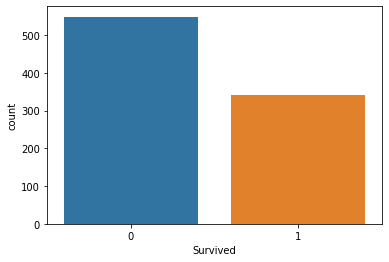

In [10]:
sns.countplot(x="Survived", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

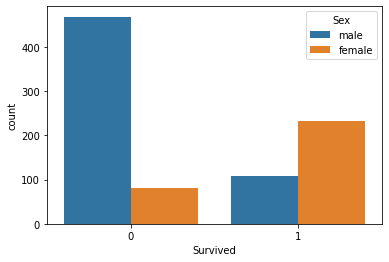

In [11]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

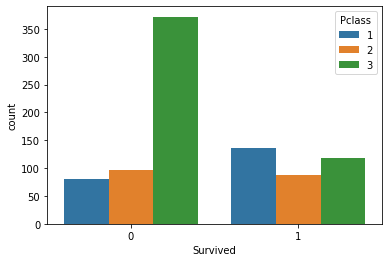

In [12]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

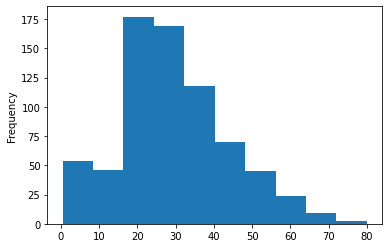

In [13]:
# Age distribution
titanic_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

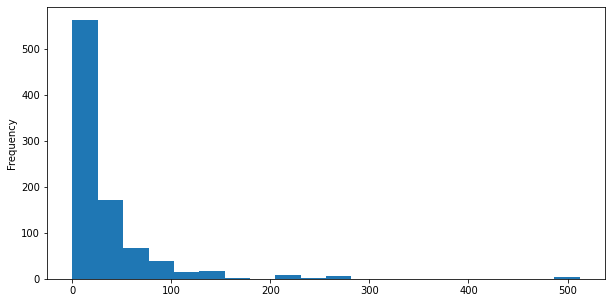

In [16]:
# Fare distribution
# titanic_data["Fare"].plot.hist()
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

In [17]:
# Obtain colummns info
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

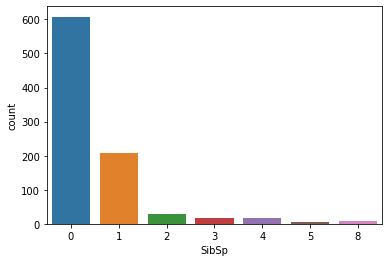

In [20]:
# Sibsp distribution
sns.countplot(x="SibSp", data=titanic_data)

## Data Wrangling

In [21]:
# Check is null or not
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
# Check count of null vlaues
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

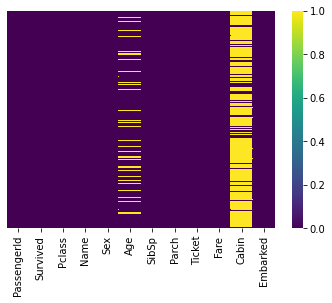

In [29]:
# Plotting heatmap to visualize null values
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

### Imputation

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

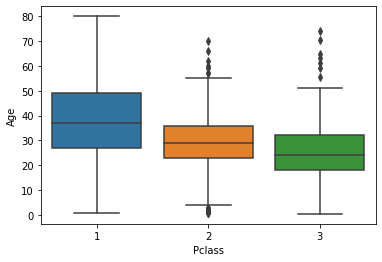

In [30]:
# Box plot to analyze missing Age values
sns.boxplot(x="Pclass", y="Age", data=titanic_data)